In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
from wordcloud import WordCloud, STOPWORDS 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [2]:
import string

In [64]:
jeopardy = pd.read_csv('master_season1-35.tsv', sep = "\t")
train_set  = jeopardy.sample(frac = .8, axis = 0, random_state = 123)
test_set = jeopardy.drop(train_set.index)
sub_train = train_set.sample(frac = .1, axis = 0, random_state = 123)
sub_train.head()

,round,value,daily_double,category,comments,answer,question,air_date,notes
346971,2,10617,yes,"\""O"" THE PLACES YOU'LL GO",-,"Pack your bags for this city, Japan's third-la...",Osaka,2019-05-20,-
312704,1,200,no,BEFORE THEY WERE FIRST LADIES,-,In 1983 she was Arkansas' Woman of the Year,Hillary Clinton,2016-07-13,-
264777,2,800,no,TEA TIME MOVIE,-,Johnny Depp is at least eccentric as this tea ...,the Mad Hatter,2012-10-01,-
118365,1,200,no,EUROPEAN HISTORY,-,According to these historic prose epics by Ice...,Sagas,2001-01-12,-
309082,1,600,no,PAY,-,If you initiate a business transaction between...,a finder's fee,2016-04-07,-


1. turn the '-' into NaN or a 0, or -1
2. remove stopwords
3. remove punctuation (but keep track of it since I may want to keep punctuation for quotes)
4. Handle the n-grams > 1
5. Convert the airdate to a date-time index
6. convert the yes/no in daily double to booleans or 1 0

In [6]:
def stringify(df, col):
    return ' '.join(df[col])

def lowercase(df, col):
    return ' '.join(df[col]).lower()

def remove_punc(df, col):
    return None

def tokenize(df, col):
    text = lowercase(df, col)
    tokenize = [word_tokenize(content) for content in text]
    return tokenize

def remove_stopwords(df, col):
    docs = tokenize(df, col)
    text = lowercase(df, col)
    stopwords_set = set(stopwords.words('english'))
    return [[word for word in text if word not in stopwords_set] for word in docs]
    return content

In [63]:
def clean_columns(df, col):
    '''
    using a pre-made function 
    returns a list of the tokenized and stripped of stopwords 
    '''
    text = stringify(df, col)
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

' '.join(clean_columns(sub_train, 'category'))

'places go first ladies tea time movie european history pay baby care comedic actresses berber collage flying machines tickle ivories englishmen rocks minerals american playwrights starts month abbrev brit lit friends playboy cover boys art citing president everyday italian bestsellers gorgeous asian cities first ladies pocket white house beyond belief rolling stones songs verbs eurovision song contest mate rx go college new york times science times safari good election terms newscasters terre haute cuisine number please yellowstone national park done rocket science thing school year making zine live texas world religion field trip century europe boxing movies planet earth reporting news know say double double letters senate committees tv teachers discoveries us geography fruit forward afraid novel subtitle nation capital words containing q object com state trees islands elevation destination globe compound word construction title lovers business industry c literature fancy stuff russi

Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

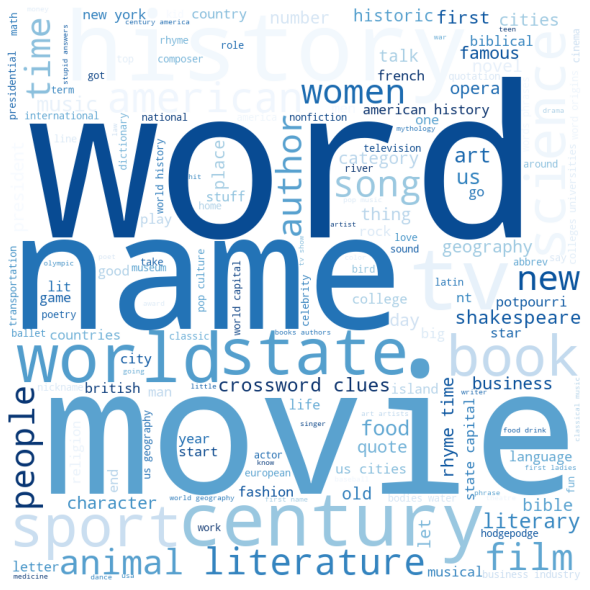

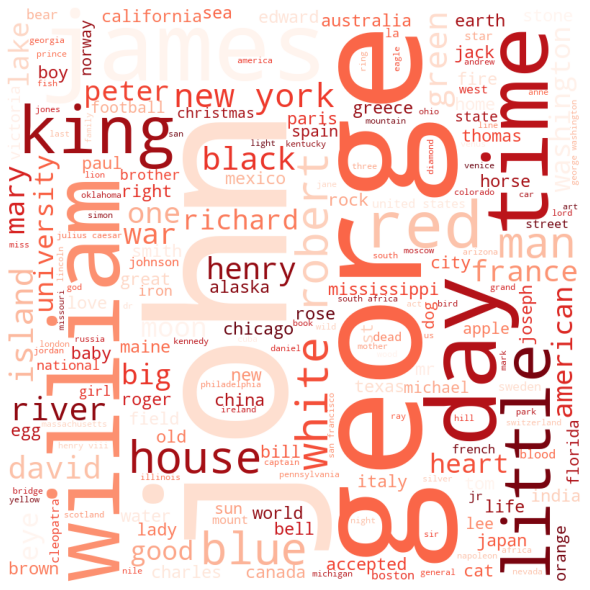

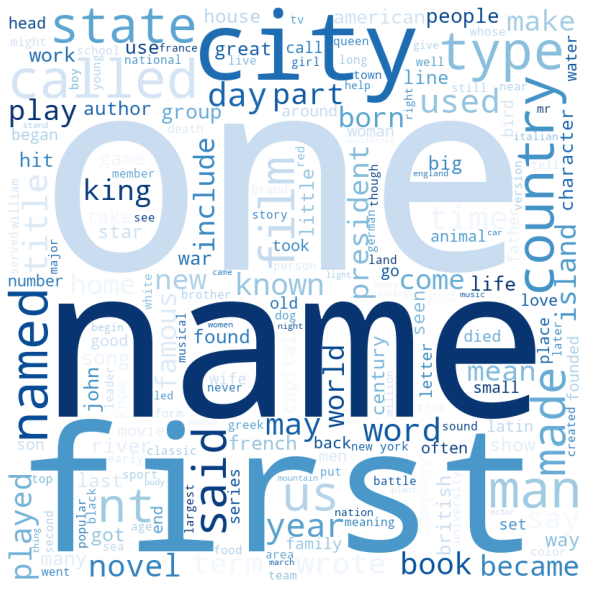

In [59]:
def make_word_cloud(df, col, color, save = False):

    #generate word list
    word_lst = clean_columns(df, col)
    words = ' '.join(word_lst)
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap = color,
                min_font_size = 10).generate(words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    if save:
        plt.savefig(f'{col}_wordcloud.png')
    else:
        plt.show()
    

make_word_cloud(sub_train, 'category', 'Blues_r')
make_word_cloud(sub_train, 'question', 'Reds')
make_word_cloud(sub_train, 'answer', 'Blues_r')

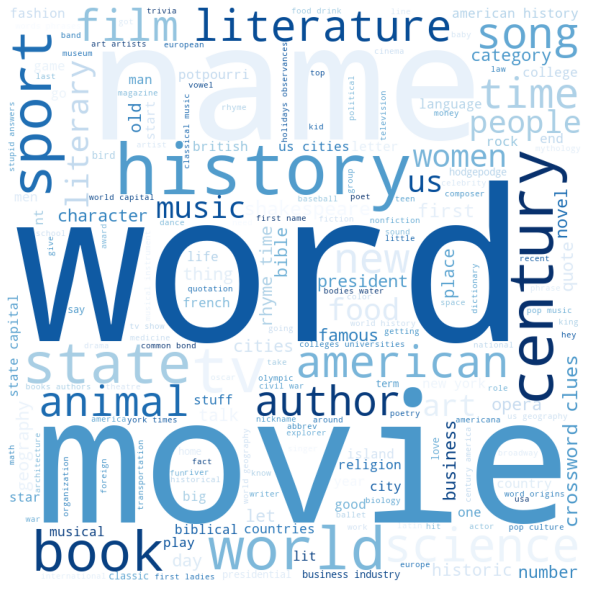

In [30]:
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap = 'Blues_r', 
                min_font_size = 10).generate(categories) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
categories = stringify(jeopardy, 'category')
answers = jeopardy['answer']
questions = jeopardy['question']
notes = jeopardy['notes']
comments = jeopardy['comments']
num_docs = len(jeopardy.values)

easy_tournaments = jeopardy[jeopardy['notes'].str.contains('kid|teen|college', case = False)]
hard_tournaments = jeopardy[jeopardy['notes'].str.contains('champion', case = False)]
normal_tournaments = jeopardy[jeopardy['notes'] == '-']

set(jeopardy['notes'].values)
#teen, celebrity, kid, teacher, college, tournament of champions, international, million dollar masters, 

#remove numbers, punctuation, final, quarterfinal, game, jeopardy!, semifinal, round, 

remove_words = ['final', 'quarterfinal', 'game', 'jeopardy!', 'semifinal', 'round', 'tournament', 'week', 'reunion', 'ultimate']

categories

In [ ]:
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english', analyzer='word', max_df=1.0, min_df=1, max_features=None)


In [ ]:
count_vect.fit(categories)

In [ ]:
count_vect.vocabulary_

- output of vectorizer is the array of the bag of words
- vocabulary attribuyte gives word mapped to the index 
- i need to associate the words I want and sum up column wise to get the counts of the words 